## Visualizing the Fund Disbursement on Development Projects from USAID to Nepal (2001-2019)

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib as mpl


%matplotlib inline

In [2]:
# !pip install pywaffle

### Importing the dataset `https://explorer.usaid.gov/query`

In [3]:
# Data file link: https://drive.google.com/file/d/1BZFUCvlyFgIdqj2P8mrmbRKwu81iMtqC/view?usp=sharing

df = pd.read_csv("final_usaid_data_nepal.csv")
df.head(1)

implementing_agency_name                 subagency_name  \
0  U.S. Agency for International Development  Bureau for Asia and Near East   

  channel_category_name channel_subcategory_name             channel_name  \
0                   NGO      NGO - United States  John Snow International   

       dac_category_name                             dac_sector_name  \
0  Health and Population  Maternal and Child Health, Family Planning   

           dac_purpose_name  \
0  Reproductive health care   

                                funding_account_name assistance_category_name  \
0  Agency for International Development, Child Su...                 Economic   

   ... activity_end_date transaction_type_name fiscal_year current_amount  \
0  ...               NaN         Disbursements        2001        2104253   

   constant_amount                        funding_agency_name  \
0          2850655  U.S. Agency for International Development   

   funding_agency_acronym aid_type_group_name  \
0                   USAID        Project-Type   

                                activity_description  \
0  Reduced Fertility and Protected Health of Nepa...   

             USG_sector_name  
0  Maternal and Child Health  

[1 rows x 22 columns]

### Changing the data type of `constant_amount` column (from int to str)

In [4]:
df["constant_amount"]= df["constant_amount"].astype(str)

### Replacing the negative sign (-) from the `constant_amount` column

In [5]:
df['constant_amount'] = df['constant_amount'].str.replace('^-','')

### Changing the data type of `constant_amount` (from str to float64)

In [6]:
df["constant_amount"]= df["constant_amount"].astype(float)

### Exporting the DataFrame to `CSV`

In [7]:
yr_df = df.groupby(['USG_sector_name','fiscal_year'])['constant_amount'].sum()
yr_df.to_csv("yearwise.csv")

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


### Importing the exported `CSV` file

In [8]:
yearwise = pd.read_csv("yearwise.csv")
yearwise.head(2)

Agriculture  2001  4231494.0
0  Agriculture  2002  3124628.0
1  Agriculture  2003  2823699.0

### Assigning the column names 

In [9]:
yearwise.columns = ['sector','year','amount_disbursed']
yearwise.head(2)

sector  year  amount_disbursed
0  Agriculture  2002         3124628.0
1  Agriculture  2003         2823699.0

### List of maximum amount disbursed each year

In [10]:
max_yr = pd.DataFrame(yearwise.groupby(['year'])['amount_disbursed'].agg(max))
max_yr.head(2)


amount_disbursed
year                  
2001         9576902.0
2002        19166507.0

### Joining the `amount_disbursed` columns
#####  To add the name of sectors with max amount disbursed 

In [11]:
max_by_yr = pd.merge(max_yr, yearwise, on='amount_disbursed', how='left')
max_by_yr.head(2)

amount_disbursed                                             sector  year
0         9576902.0                          Maternal and Child Health  2001
1        19166507.0  Stabilization Operations and Security Sector R...  2002

### List of minimum amount disbursed each year

In [12]:
min_yr = pd.DataFrame(yearwise.groupby(['year'])['amount_disbursed'].agg(min))
min_yr.head(2)

amount_disbursed
year                  
2001            8128.0
2002            3333.0

### Joining the `amount_disbursed` columns 
##### To get the name of sectors with min amount disbursed


In [13]:
min_by_yr = pd.merge(min_yr, yearwise, on='amount_disbursed', how='left')
min_by_yr.head(1)

amount_disbursed                        sector  year
0            8128.0  Rule of Law and Human Rights  2001

### Joining the `year` columns  from both (min, max) DataFrames

In [14]:
min_max_by_yr = pd.merge(min_by_yr, max_by_yr, on='year')
min_max_by_yr.head(1)

amount_disbursed_x                      sector_x  year  amount_disbursed_y  \
0              8128.0  Rule of Law and Human Rights  2001           9576902.0   

                    sector_y  
0  Maternal and Child Health

### Getting only the rows that contain `Direct Administrative Costs` from `sector` column

In [15]:
admin_cost=yearwise.loc[yearwise['sector'].isin(['Direct Administrative Costs'])]
admin_cost.head(2)

sector  year  amount_disbursed
93  Direct Administrative Costs  2001         2614139.0
94  Direct Administrative Costs  2002         3514377.0

### Merging the three DataFrames `(min disbursed, max disbursed and administrative cost )` by joining the common column `year`

In [16]:
merged_all = pd.merge(min_max_by_yr, admin_cost, on='year')
merged_all.head(1)

amount_disbursed_x                      sector_x  year  amount_disbursed_y  \
0              8128.0  Rule of Law and Human Rights  2001           9576902.0   

                    sector_y                       sector  amount_disbursed  
0  Maternal and Child Health  Direct Administrative Costs         2614139.0

### Creating multiple line charts from the merged DataFrame

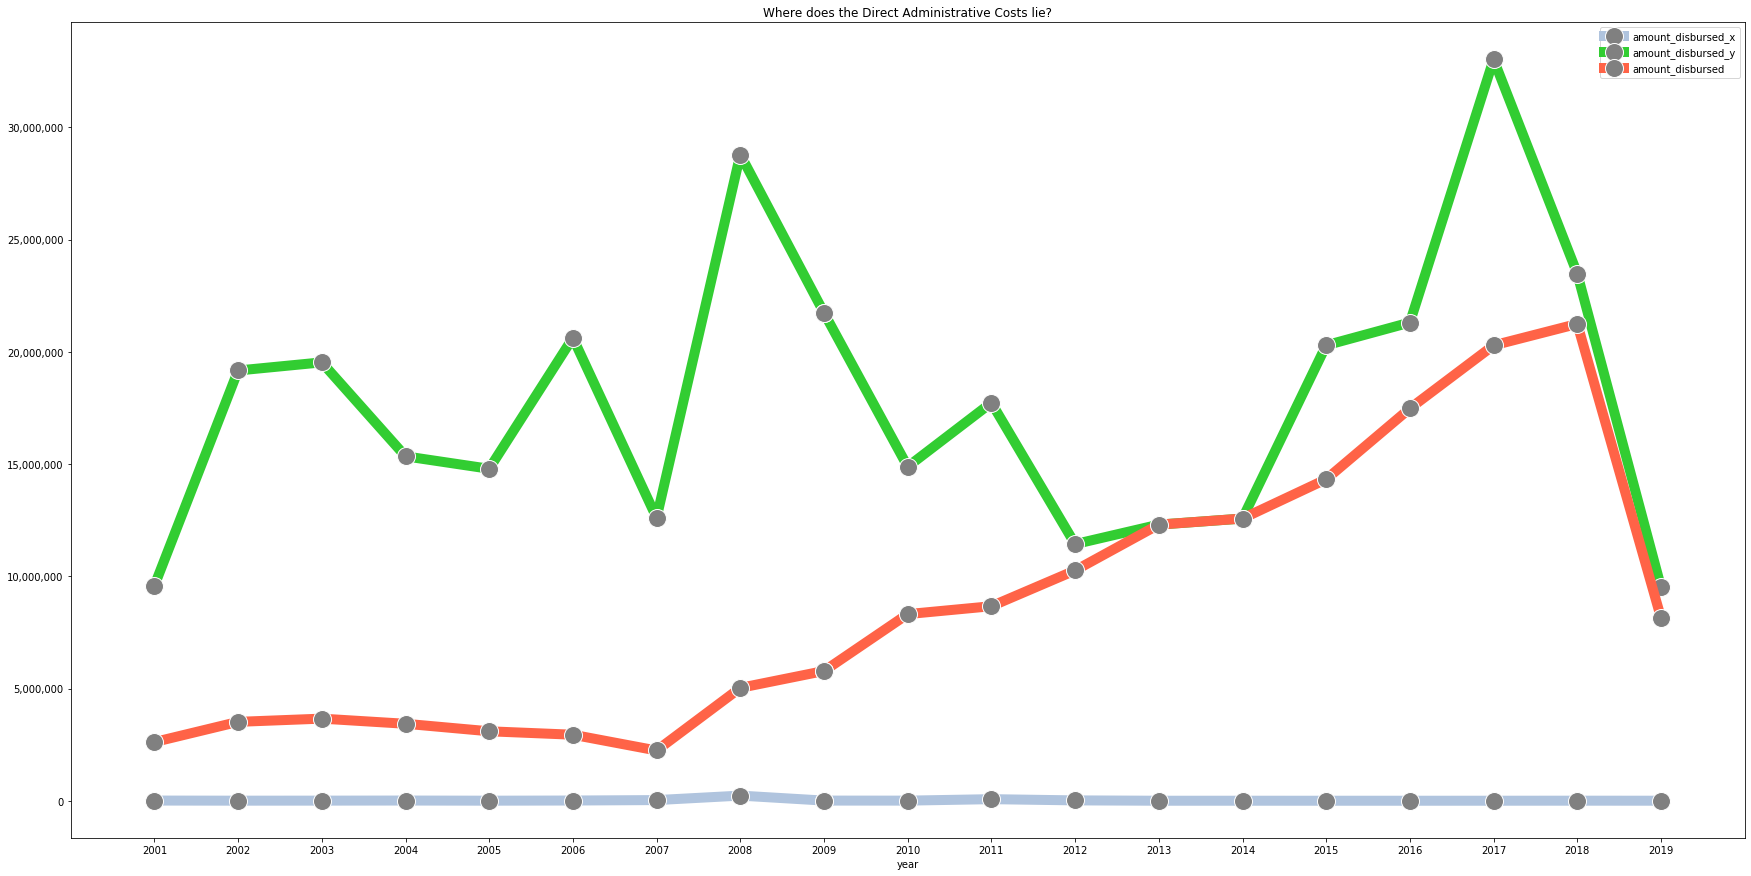

In [40]:
ax = merged_all.plot(x='year', 
               y=['amount_disbursed_x', 'amount_disbursed_y', 'amount_disbursed'],
               xlim=[2000, 2020],
               figsize=(30,15),
               linewidth = 10,
               color = ['lightsteelblue', 'limegreen', 'tomato'],
               marker = 'o', 
               mfc = 'w',
               markersize= 18,
               markerfacecolor='grey', 
               markeredgecolor='white',
               legend = True,
                     title= 'Where does the Direct Administrative Costs lie?',
               grid = False,
               xticks = [2001,
                         2002,
                         2003,
                         2004,
                         2005,
                         2006,
                         2007,
                         2008,
                         2009,
                         2010,
                         2011,
                         2012,
                         2013,
                         2014,
                         2015,
                         2016,
                         2017,
                         2018,
                         2019],
                          
                )
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.show()
plt.savefig("merged_all.pdf", box_inches = "tight")

### Selecting the years (2013-2016) from `fiscal_year` column

In [18]:
b4_trump=df.loc[df['fiscal_year'].isin([2013, 2014, 2015, 2016])]
b4_trump.head(2)

implementing_agency_name                subagency_name  \
2944                  Department of Agriculture  Foreign Agricultural Service   
2945  U.S. Agency for International Development               Bureau for Asia   

     channel_category_name       channel_subcategory_name  \
2944          Multilateral  Multilateral - United Nations   
2945                   NGO            NGO - International   

                            channel_name      dac_category_name  \
2944                  World Food Program              Education   
2945  Save the Children Federation, Inc.  Health and Population   

                                 dac_sector_name          dac_purpose_name  \
2944                             Basic Education            School feeding   
2945  Maternal and Child Health, Family Planning  Reproductive health care   

                                   funding_account_name  \
2944  McGovern-Dole International Food for Education...   
2945        Department of State, Global Health Programs   

     assistance_category_name  ...        activity_end_date  \
2944                 Economic  ...                      NaN   
2945                 Economic  ...  2016-10-28 00:00:00 UTC   

     transaction_type_name fiscal_year current_amount  constant_amount  \
2944         Disbursements        2013        5125799        5435040.0   
2945         Disbursements        2013        4915334        5211877.0   

            funding_agency_name  funding_agency_acronym aid_type_group_name  \
2944  Department of Agriculture                     AGR        Project-Type   
2945        Department of State                   STATE        Project-Type   

                                   activity_description  \
2944  The McGovern-Dole program provides for the don...   
2945  The primary purpose of the INP is to improve t...   

                USG_sector_name  
2944                  Nutrition  
2945  Maternal and Child Health  

[2 rows x 22 columns]

### Count of `disbursed amount` on each sector/category 
##### From 2013- 2016 (three years before Trump's presidency)


In [19]:
count_b4_trump = pd.DataFrame(b4_trump.USG_sector_name.value_counts()).reset_index()
count_b4_trump.head()

index  USG_sector_name
0             Direct Administrative Costs              581
1    Protection, Assistance and Solutions               84
2  Conflict Mitigation and Reconciliation               80
3               Maternal and Child Health               77
4                             Agriculture               64

### Sum of `disbursed amount` on each sector/category 
##### From 2013- 2016 (three years before Trump's presidency)

In [20]:
sum_b4_trump = pd.DataFrame(b4_trump.groupby('USG_sector_name')['constant_amount'].sum().sort_values(ascending=False)).reset_index()
sum_b4_trump.head()

USG_sector_name  constant_amount
0              Direct Administrative Costs       56672182.0
1                Maternal and Child Health       54842079.0
2                                Nutrition       53784601.0
3                              Agriculture       47236634.0
4  Family Planning and Reproductive Health       47087537.0

### Merging the `SUM` and `COUNT`  DataFrames ` b4_trump`
##### Joining the columns based on sector name

In [21]:
merge_b4_trump = pd.merge(count_b4_trump, sum_b4_trump, left_on='index', right_on='USG_sector_name')
merge_b4_trump.head()

index  USG_sector_name_x  \
0             Direct Administrative Costs                581   
1    Protection, Assistance and Solutions                 84   
2  Conflict Mitigation and Reconciliation                 80   
3               Maternal and Child Health                 77   
4                             Agriculture                 64   

                        USG_sector_name_y  constant_amount  
0             Direct Administrative Costs       56672182.0  
1    Protection, Assistance and Solutions       44764516.0  
2  Conflict Mitigation and Reconciliation       20918913.0  
3               Maternal and Child Health       54842079.0  
4                             Agriculture       47236634.0

### Creating sectorwise scatter plot of USAID projects `b4_trump`
### Green color dots represent `CLIMATE CHANGE ADAPTATION` related projects

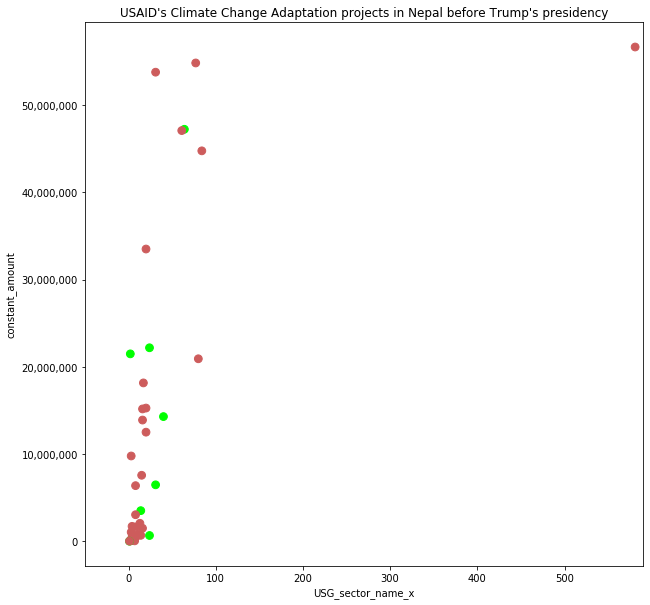

In [41]:
def build_colors(row):
    if row['index'] == 'Agriculture':
        return 'lime'
    elif row['index'] == 'Natural Resources and Biodiversity':
        return 'lime'
    elif row['index'] == 'Disaster Readiness':
        return 'lime'
    elif row['index'] == 'Environment - General':
        return 'lime'
    elif row['index'] == 'Clean Productive Environment':
        return 'lime'
    elif row['index'] == 'Water Supply and Sanitation':
        return 'lime'
    elif row['index'] == 'Environment':
        return 'lime'
    elif row['index'] == 'Humanitarian Assistance - General':
        return 'lime'
    else:
        return 'indianred'

colors = merge_b4_trump.reset_index().apply(build_colors, axis=1)


ax = merge_b4_trump.plot(x='USG_sector_name_x',
                         y='constant_amount',
                         color=colors,
                         kind='scatter',
                         s=[60],
                         xlim=(-50,590),
                         figsize=(10, 10),
                         legend=True,
                         title="USAID's Climate Change Adaptation projects in Nepal before Trump's presidency",                        )
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig("merge_b4_trump.pdf", box_inches = "tight")


### Selecting the years (2016-2019) from `fiscal_year` column
##### From 2016- 2019 (three years after Trump's presidency)

In [23]:
after_trump=df.loc[df['fiscal_year'].isin([2016, 2017,2018,2019])]
after_trump.head(2)

implementing_agency_name                       subagency_name  \
3943      Department of Defense  Defense Security Cooperation Agency   
3944  Department of Agriculture         Foreign Agricultural Service   

     channel_category_name       channel_subcategory_name  \
3943            Government     Government - United States   
3944          Multilateral  Multilateral - United Nations   

                                 channel_name dac_category_name  \
3943  U.S. Government - Department of Defense        Governance   
3944                       World Food Program         Education   

                    dac_sector_name                       dac_purpose_name  \
3943  Conflict, Peace, and Security  Security system management and reform   
3944                Basic Education                         School feeding   

                                   funding_account_name  \
3943                 Foreign Military Financing Program   
3944  McGovern-Dole International Food for Education...   

     assistance_category_name  ...        activity_end_date  \
3943                 Military  ...                      NaN   
3944                 Economic  ...  2020-09-30 00:00:00 UTC   

     transaction_type_name fiscal_year current_amount  constant_amount  \
3943         Disbursements        2016       18000000       18309451.0   
3944         Disbursements        2016       11838803       12042332.0   

            funding_agency_name  funding_agency_acronym aid_type_group_name  \
3943      Department of Defense                     DOD        Project-Type   
3944  Department of Agriculture                     AGR        Project-Type   

                                   activity_description  \
3943  The amount of credit extended to a foreign gov...   
3944  The McGovern-Dole program provides for the don...   

                                        USG_sector_name  
3943  Stabilization Operations and Security Sector R...  
3944                                          Nutrition  

[2 rows x 22 columns]

### Count of `disbursed amount` on each sector/category
##### From 2016- 2019 (three years after Trump's presidency)

In [24]:
count_after_trump = pd.DataFrame(after_trump.USG_sector_name.value_counts()).reset_index()
count_after_trump.head()

index  USG_sector_name
0              Direct Administrative Costs              451
1     Protection, Assistance and Solutions               93
2                Maternal and Child Health               79
3  Family Planning and Reproductive Health               77
4                              Agriculture               63

### Sum of `disbursed amount` on each sector/category 
#####  From 2010 2019 ( three years after Trump's presidency)

In [25]:
sum_after_trump = pd.DataFrame(after_trump.groupby('USG_sector_name')['constant_amount'].sum().sort_values(ascending=False)).reset_index()
sum_after_trump.head(1)

USG_sector_name  constant_amount
0     Agriculture       86866618.0

### Merging the `SUM` and `COUNT`  DataFrames ` after_trump`
##### Joining the columns based on sector name

In [26]:
merge_after_trump = pd.merge(count_after_trump, sum_after_trump, left_on='index', right_on='USG_sector_name')
merge_after_trump.head()

index  USG_sector_name_x  \
0              Direct Administrative Costs                451   
1     Protection, Assistance and Solutions                 93   
2                Maternal and Child Health                 79   
3  Family Planning and Reproductive Health                 77   
4                              Agriculture                 63   

                         USG_sector_name_y  constant_amount  
0              Direct Administrative Costs       67155913.0  
1     Protection, Assistance and Solutions       29707483.0  
2                Maternal and Child Health       65411444.0  
3  Family Planning and Reproductive Health       46433688.0  
4                              Agriculture       86866618.0

### Creating sectorwise scatter plot of USAID projects `after_trump`
### Green color dots represent `CLIMATE CHANGE ADAPTATION` related projects

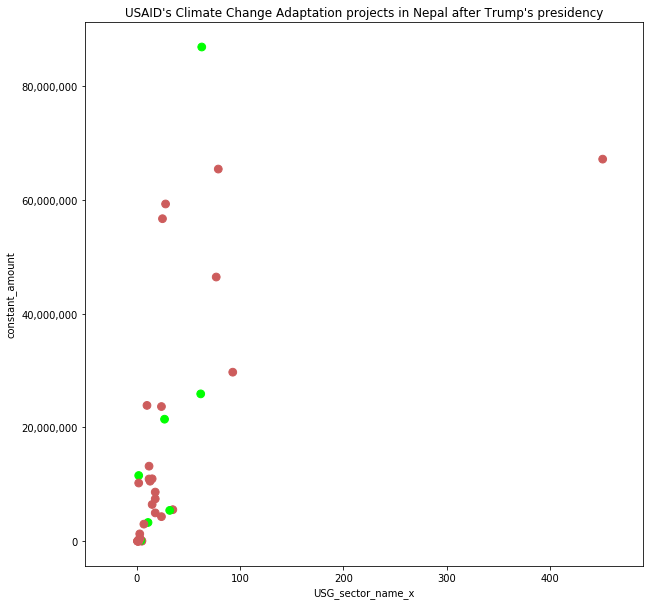

In [42]:
def build_colors(row):
    if row['index'] == 'Agriculture':
        return 'lime'
    elif row['index'] == 'Natural Resources and Biodiversity':
        return 'lime'
    elif row['index'] == 'Disaster Readiness':
        return 'lime'    
    elif row['index'] == 'Clean Productive Environment':
        return 'lime'
    elif row['index'] == 'Water Supply and Sanitation':
        return 'lime'
    elif row['index'] == 'Environment':
        return 'lime'
    elif row['index'] == 'Humanitarian Assistance - General':
        return 'lime'
    else:
        return 'indianred'

colors = merge_after_trump.reset_index().apply(build_colors, axis=1)


ax = merge_after_trump.plot(x='USG_sector_name_x',
                            y='constant_amount',
                            color=colors,
                            kind='scatter',
                            s=[60],
                            xlim=(-50,490),
                            figsize=(10, 10),
                            legend=True,
                            title="USAID's Climate Change Adaptation projects in Nepal after Trump's presidency",
                           )
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("merge_after_trump.pdf", box_inches = "tight")

### Selecting the years after the Nepal's 2015 April Earthquake 

In [28]:
after_earthquake =df.loc[df['fiscal_year'].isin([2015, 2016,2017,2018,2019])]
after_earthquake.head(2)

implementing_agency_name  \
3578                      Department of Defense   
3579  U.S. Agency for International Development   

                           subagency_name channel_category_name  \
3578  Defense Security Cooperation Agency            Government   
3579                      Bureau for Asia                   NGO   

        channel_subcategory_name                             channel_name  \
3578  Government - United States  U.S. Government - Department of Defense   
3579         NGO - International       Save the Children Federation, Inc.   

          dac_category_name     dac_sector_name  \
3578           Humanitarian  Emergency Response   
3579  Health and Population        Basic Health   

                             dac_purpose_name  \
3578  Material relief assistance and services   
3579                          Basic nutrition   

                                   funding_account_name  \
3578  Department of Defense, Overseas Humanitarian, ...   
3579        Department of State, Global Health Programs   

     assistance_category_name  ...        activity_end_date  \
3578                 Economic  ...                      NaN   
3579                 Economic  ...  2016-10-28 00:00:00 UTC   

     transaction_type_name fiscal_year current_amount  constant_amount  \
3578         Disbursements        2015        9706000        9987026.0   
3579         Disbursements        2015        8440610        8684998.0   

        funding_agency_name  funding_agency_acronym aid_type_group_name  \
3578  Department of Defense                     DOD        Project-Type   
3579    Department of State                   STATE        Project-Type   

                                   activity_description  \
3578  Humanitarian Assistance for the Nepal Earthqua...   
3579  The primary purpose of the INP is to improve t...   

                        USG_sector_name  
3578  Humanitarian Assistance - General  
3579                          Nutrition  

[2 rows x 22 columns]

### Searching for `earthquake and reconstruction` related projects from the `after_earthquake` DataFrame


In [29]:
eq1 = after_earthquake.loc[after_earthquake.apply(lambda row: row.astype(str).str.contains('Earthquake').any(), axis=1)]

eq1.shape

(34, 22)

In [30]:
eq2 = after_earthquake.loc[after_earthquake.apply(lambda row: row.astype(str).str.contains('earthquake').any(), axis=1)]
eq2.shape

(40, 22)

In [31]:
eq3 = after_earthquake.loc[after_earthquake.apply(lambda row: row.astype(str).str.contains('Reconstruction').any(), axis=1)]
eq3.shape

(16, 22)

In [32]:
eq4 = after_earthquake.loc[after_earthquake.apply(lambda row: row.astype(str).str.contains('reconstruction').any(), axis=1)]
eq4.shape

(7, 22)

In [33]:
merged_eq = pd.concat([eq1, eq2, eq3, eq4], ignore_index=True)
merged_eq.head(1)

implementing_agency_name                       subagency_name  \
0    Department of Defense  Defense Security Cooperation Agency   

  channel_category_name    channel_subcategory_name  \
0            Government  Government - United States   

                              channel_name dac_category_name  \
0  U.S. Government - Department of Defense      Humanitarian   

      dac_sector_name                         dac_purpose_name  \
0  Emergency Response  Material relief assistance and services   

                                funding_account_name assistance_category_name  \
0  Department of Defense, Overseas Humanitarian, ...                 Economic   

   ... activity_end_date transaction_type_name fiscal_year current_amount  \
0  ...               NaN         Disbursements        2015        9706000   

   constant_amount    funding_agency_name  funding_agency_acronym  \
0        9987026.0  Department of Defense                     DOD   

  aid_type_group_name                               activity_description  \
0        Project-Type  Humanitarian Assistance for the Nepal Earthqua...   

                     USG_sector_name  
0  Humanitarian Assistance - General  

[1 rows x 22 columns]

### Dropping the duplicate rows

In [34]:
unique_eq = merged_eq.drop_duplicates(keep=False, inplace=False)
unique_eq.shape

(69, 22)

### Creating a new `value` column in `unique_eq` DataFrame by assigning value = 1 

In [35]:
unique_eq ['value'] = 1
unique_eq.head(2)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


implementing_agency_name  \
0                      Department of Defense   
1  U.S. Agency for International Development   

                                      subagency_name channel_category_name  \
0                Defense Security Cooperation Agency            Government   
1  Bureau for Democracy, Conflict and Humanitaria...                   NGO   

     channel_subcategory_name                                channel_name  \
0  Government - United States     U.S. Government - Department of Defense   
1     NGO - Non United States  National Society for Earthquake Technology   

  dac_category_name                       dac_sector_name  \
0      Humanitarian                    Emergency Response   
1      Humanitarian  Disaster Prevention and Preparedness   

                          dac_purpose_name  \
0  Material relief assistance and services   
1       Multi-hazard response preparedness   

                                funding_account_name assistance_category_name  \
0  Department of Defense, Overseas Humanitarian, ...                 Economic   
1  Agency for International Development, Internat...                 Economic   

   ... transaction_type_name fiscal_year current_amount constant_amount  \
0  ...         Disbursements        2015        9706000       9987026.0   
1  ...         Disbursements        2015        1104423       1136400.0   

                         funding_agency_name  funding_agency_acronym  \
0                      Department of Defense                     DOD   
1  U.S. Agency for International Development                   USAID   

   aid_type_group_name                               activity_description  \
0         Project-Type  Humanitarian Assistance for the Nepal Earthqua...   
1         Project-Type  Improve the ability of the USG, host countries...   

                     USG_sector_name value  
0  Humanitarian Assistance - General     1  
1                 Disaster Readiness     1  

[2 rows x 23 columns]

### Creating a new `value` column in `after_earthquake` DataFrame by assigning value = 2

In [36]:
after_earthquake ['value'] = 2
after_earthquake.head(2)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


implementing_agency_name  \
3578                      Department of Defense   
3579  U.S. Agency for International Development   

                           subagency_name channel_category_name  \
3578  Defense Security Cooperation Agency            Government   
3579                      Bureau for Asia                   NGO   

        channel_subcategory_name                             channel_name  \
3578  Government - United States  U.S. Government - Department of Defense   
3579         NGO - International       Save the Children Federation, Inc.   

          dac_category_name     dac_sector_name  \
3578           Humanitarian  Emergency Response   
3579  Health and Population        Basic Health   

                             dac_purpose_name  \
3578  Material relief assistance and services   
3579                          Basic nutrition   

                                   funding_account_name  \
3578  Department of Defense, Overseas Humanitarian, ...   
3579        Department of State, Global Health Programs   

     assistance_category_name  ... transaction_type_name fiscal_year  \
3578                 Economic  ...         Disbursements        2015   
3579                 Economic  ...         Disbursements        2015   

     current_amount constant_amount    funding_agency_name  \
3578        9706000       9987026.0  Department of Defense   
3579        8440610       8684998.0    Department of State   

      funding_agency_acronym  aid_type_group_name  \
3578                     DOD         Project-Type   
3579                   STATE         Project-Type   

                                   activity_description  \
3578  Humanitarian Assistance for the Nepal Earthqua...   
3579  The primary purpose of the INP is to improve t...   

                        USG_sector_name value  
3578  Humanitarian Assistance - General     2  
3579                          Nutrition     2  

[2 rows x 23 columns]

### Appending two DataFrames `after_earthquake` and `unique_eq`

In [37]:
eq_merged_values = pd.concat([after_earthquake, unique_eq ], ignore_index=True)
eq_merged_values.head(2)

implementing_agency_name  \
0                      Department of Defense   
1  U.S. Agency for International Development   

                        subagency_name channel_category_name  \
0  Defense Security Cooperation Agency            Government   
1                      Bureau for Asia                   NGO   

     channel_subcategory_name                             channel_name  \
0  Government - United States  U.S. Government - Department of Defense   
1         NGO - International       Save the Children Federation, Inc.   

       dac_category_name     dac_sector_name  \
0           Humanitarian  Emergency Response   
1  Health and Population        Basic Health   

                          dac_purpose_name  \
0  Material relief assistance and services   
1                          Basic nutrition   

                                funding_account_name assistance_category_name  \
0  Department of Defense, Overseas Humanitarian, ...                 Economic   
1        Department of State, Global Health Programs                 Economic   

   ... transaction_type_name fiscal_year current_amount constant_amount  \
0  ...         Disbursements        2015        9706000       9987026.0   
1  ...         Disbursements        2015        8440610       8684998.0   

     funding_agency_name  funding_agency_acronym  aid_type_group_name  \
0  Department of Defense                     DOD         Project-Type   
1    Department of State                   STATE         Project-Type   

                                activity_description  \
0  Humanitarian Assistance for the Nepal Earthqua...   
1  The primary purpose of the INP is to improve t...   

                     USG_sector_name value  
0  Humanitarian Assistance - General     2  
1                          Nutrition     2  

[2 rows x 23 columns]

### Creating a scatter chart superimposing the earthquake recovery projects on all USAID's projects after 2015

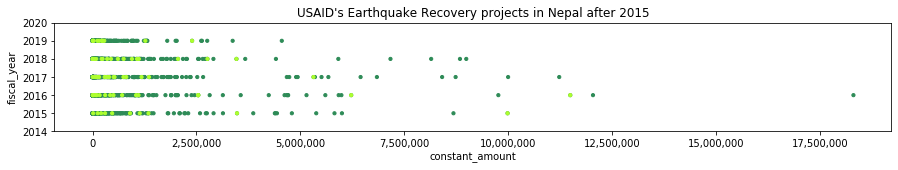

In [54]:
def build_colors(row):
    if row['value'] == 1:
        return 'greenyellow'
    else:
        return 'seagreen'

colors = eq_merged_values.reset_index().apply(build_colors, axis=1)


ax = eq_merged_values.plot(x='constant_amount',
                           y='fiscal_year',
                           color=colors,
                           kind='scatter',
                           s=[10],
                           figsize=(15, 2),
                           legend=True,
                           title="USAID's Earthquake Recovery projects in Nepal after 2015",
                           ylim=(2014,2020),
                           yticks = [2014, 2015, 2016, 2017, 2018, 2019, 2020],
                          )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("eq_merged_values1.pdf", box_inches = "tight")

# plt.show()